In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [3]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
dfPca = pd.DataFrame(pca.fit_transform(df.iloc[:, :4]), columns=['pc1','pc2'])
dfPca

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


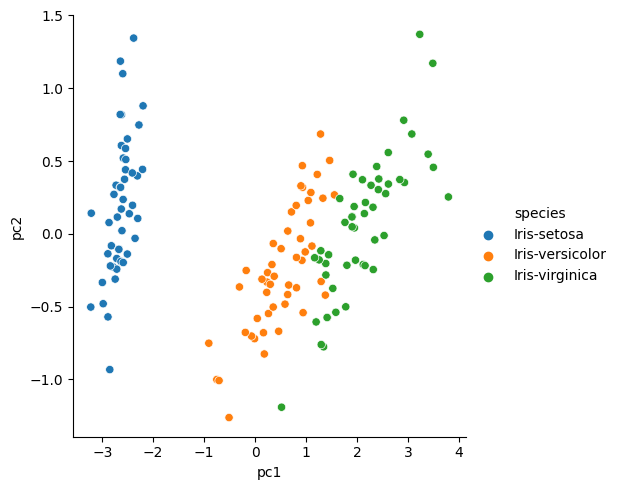

In [4]:
dfM = df.join(dfPca)
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.show()

#### Now, since we are not allowed to use regression to separate these, let us try and estimate two decision boundaries. 
#### Between the Iris Setosa and Versicolor, we can find 2 points, (-2.5, -1.5) and (0, 1). Using linear algebra, the equation of this line is: y = x+1

#### Between the Iris Versicolor and Virginica, we can find 2 points, (1, 0) and (2, 0.5). Using linear algebra, the equation of this line is: y = 0.5x - 0.5

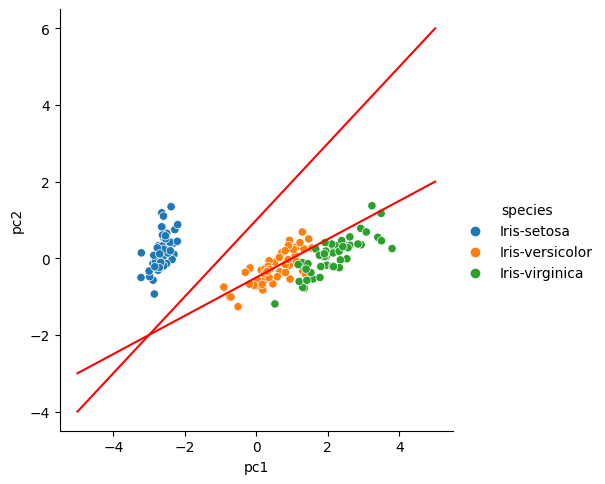

In [5]:
#Plotting the above lines on the graph, we get:
a = np.linspace(-5,5,100)
b = a+1
c = 0.5*a - 0.5
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.plot(a, b, '-r')
plt.plot(a, c, '-r')
plt.show()

#### The first decision boundary looks good, but the second does not. Let's try increasing the slope of the function from 0.5 to 0.8

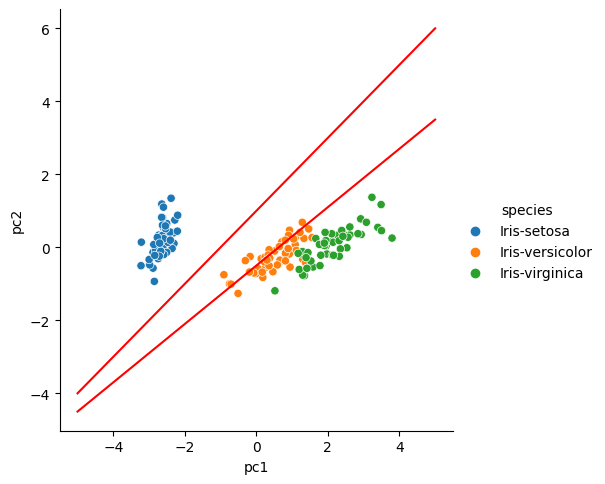

In [6]:
a = np.linspace(-5,5,100)
b = a+1
c = 0.8*a - 0.5  #increase in slope
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.plot(a, b, '-r')
plt.plot(a, c, '-r')
plt.show()

#### Now we just have to shift the intercept down. Lets make it -1 instead of -0.5

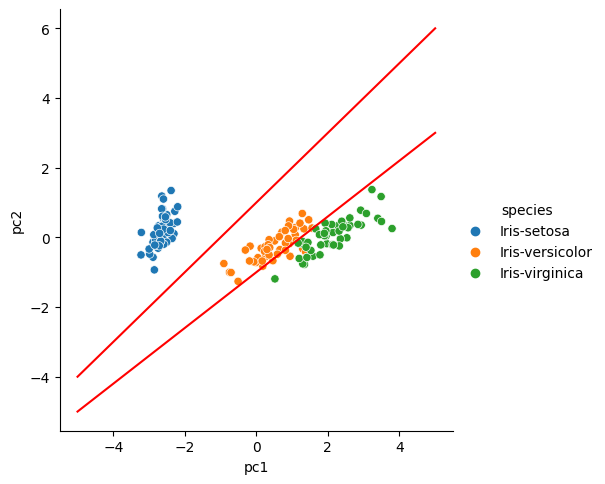

In [7]:
a = np.linspace(-5,5,100)
b = a+1
c = 0.8*a - 1  #intercept change
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.plot(a, b, '-r')
plt.plot(a, c, '-r')
plt.show()

#### These look like strong decision boundaries. To reiterate, the line that divides Iris setosa from Iris- versilcolor is y = x+1 
#### And the line that divides Versicolor from Virginica is y = 0.8x -1

#### Now we can convert each test case into its 2 principal components and see where it lies 

In [8]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    dfM_new = dfM.drop(columns ='species') #remove the labels
    mask = (dfM_new['sepal_length'] == sepal_length) & (dfM_new['sepal_width'] == sepal_width) & (dfM_new['petal_length'] == petal_length) & (dfM_new['petal_width'] == petal_width)
    #since we already have the merged df, and we are testing on the df data itself, we find that particular columns
    
    result = dfM_new[mask].iloc[0]
    x = result['pc1']  #and extract the 2 pca values from that row, which we previously calculated
    y = result['pc2']
    if y >= x+1:
        return 'Iris-setosa'
    elif y<= 0.8*x -1:
        return 'Iris-virginica'
    else:
        return 'Iris-versicolor'
    

In [9]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667
